<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [4]:
#ваш код здесь
hh_data = pd.read_csv('/Users/aleksejvolkov/Projects_VS_Code/IDE/data_set/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [ ]:
#ваш код здесь
hh_data.head()

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [ ]:
#ваш код здесь
hh_data.info()

5. Выведите основную статистическую информацию о столбцах.


In [ ]:
#ваш код здесь
hh_data.describe(include='object')

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [7]:
#ваш код здесь
# Функция-преобразования новый признак «Образование»
def get_education(arg):
  arg_splited = arg.split(' ')
  N = len(arg_splited)
  for i in range(N): 
    if arg_splited[i] == 'Высшее':
      return 'Высшее'
    if arg_splited[i] == 'Среднее' and arg_splited[i+1] == 'специальное':
      return 'Среднее специальное'
    if arg_splited[i] == 'Среднее' and arg_splited[i+1] != 'специальное':
      return 'Среднее'
    else:
      return 'Неоконченное высшее'
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(get_education)
hh_data.drop(['Образование и ВУЗ'], axis=1, inplace=True)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [14]:
#ваш код здесь
# Функция преобразования по гендерному типу
def get_gender(arg):
    arg = ",".join(arg.split(",")[:1])
    if "Мужчина" in arg:
        return "М"
    else:
        return "Ж"
hh_data['Пол'] = hh_data['Пол, возраст'].apply(get_gender)

# Функция выделения возраста 
def get_age(arg):
    arg = arg.split(" ")
    age = int(arg[3])
    return age
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(get_age)
hh_data.drop(['Пол, возраст'], axis=1, inplace=True)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [15]:
#ваш код здесь
# Функция преобразования опыта работы
def get_experience(arg):
    if arg == 'Не указано' or arg is np.nan:
        return None
    arg = arg.split()[:7]
    year = 0
    month = 0
    for index, item in enumerate(arg):
      if item in ['год', 'года', 'лет']:
        year = int(arg[index-1])
      if item in ['месяц', 'месяца', 'месяцев']:
        month = int(arg[index-1])
    return year*12 + month
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(get_experience)
hh_data.drop(['Опыт работы'], axis=1, inplace=True)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [6]:
#ваш код здесь
# Функция создания нового признака 'город'
def get_city(arg):
  million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
  arg = arg.split()[0]
  if arg == 'Москва':
    return 'Москва'
  if arg == 'Санкт-Петербург':
    return 'Санкт-Петербург'
  if arg in million_cities:
    return 'город-миллионник'
  else:
    return 'другие'
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(get_city)

# Функция создания нового признака 'готовность к переезду'
def readiness_to_move(arg):
    if ('переезд') in arg:
      if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
          return False
      else: 
        return True
    else: 
      return True            
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(readiness_to_move)

# Функция создания нового признака 'готовность к командировкам'
def willingness_to_travel(arg):
  if 'командировка' in arg:
    if ('не готов к командировкам' in arg) or ('не готова к командировкам' in arg): 
      return False
    else: 
      return True
  else: 
    return False            
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(willingness_to_travel)
hh_data.drop(['Город, переезд, командировки'], axis=1, inplace=True)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [18]:
#ваш код здесь
# Преобразование признака 'Занятость'
hh_data['Полная занятость'] = hh_data['Занятость'].apply(lambda x: True if 'полная занятость' in x else False)
hh_data['Частичная занятость'] = hh_data['Занятость'].apply(lambda x: True if 'частичная занятость' in x else False)
hh_data['Проектная работа'] = hh_data['Занятость'].apply(lambda x: True if 'проектная работа' in x else False)
hh_data['Волонтерство'] = hh_data['Занятость'].apply(lambda x: True if 'волонтерство' in x else False)
hh_data['Стажировка'] = hh_data['Занятость'].apply(lambda x: True if 'стажировка' in x else False)
# Преобразование признака 'График'
hh_data['Полный день'] = hh_data['График'].apply(lambda x: True if 'полный день' in x else False)
hh_data['Сменный график'] = hh_data['График'].apply(lambda x: True if 'сменный график' in x else False)
hh_data['Гибкий график'] = hh_data['График'].apply(lambda x: True if 'гибкий график' in x else False)
hh_data['Удалённая работа'] = hh_data['График'].apply(lambda x: True if 'удалённая работа' in x else False)
hh_data['Вахтовый метод'] = hh_data['График'].apply(lambda x: True if 'вахтовый метод' in x else False)
hh_data.drop(['Занятость'], axis=1, inplace=True)
hh_data.drop(['График'], axis=1, inplace=True)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [19]:
#ваш код здесь
# извлечение данных по обмену валюты
money_info = pd.read_csv('/Users/aleksejvolkov/IDE//ExchangeRates.csv', sep=',')
# перевод даты в формат datetime в данных money_info
money_info['date'] = pd.to_datetime(money_info['date'])
# Функция, приведения соответствия данных таблицы к наименованию иностранной валюты
def rename_currency(arg):
    """Функция, приведения соответствия данных таблицы к наименованию иностранной валюты
    Args:
        arg ([string]): строка, содержащая наименование валюты в данных
    Returns:
        [string]: наименование валюты в ISO кодировке
    """
    # словарь валюты
    currency_dict = {
        'грн.': 'UAH', 'USD': 'USD',
        'EUR': 'EUR', 'бел.руб.': 'BYN',
        'KGS': 'KGS', 'сум': 'UZS',
        'AZN': 'AZN', 'KZT': 'KZT', 'руб.': 'RUB'
    }
    current_currency = arg.split(' ')[0]  # разделение строки по пробелам
    if current_currency in currency_dict: # приведение соответствия валюты в ISO кодировке
        return currency_dict[current_currency]
# перевод даты в таблице с резюме в формат datetime в данных
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме']).dt.date
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'])
# выделение из столбца желаемaя зп - сумму и валюту
hh_data['Сумма'] = hh_data['ЗП'].apply(lambda x: x.split()[0]).astype(float)
hh_data['Валюта'] = hh_data['ЗП'].apply(lambda x: x.split()[1])
hh_data['Валюта'] = hh_data['Валюта'].apply(rename_currency)
# объединение двух таблиц 
hh_data_merged = hh_data.merge(
    money_info,
    how='left',
    left_on=['Валюта', 'Обновление резюме'],
    right_on=['currency', 'date']
)
# заполнение столбца close и proportion значением 1.0 для рубля
mask1 = hh_data_merged['Валюта'] == 'RUB'
hh_data_merged.loc[mask1, 'close'] = 1.0 
hh_data_merged.loc[mask1, 'proportion'] = 1.0   
#Создание нового признакаа и удаление ненужных признаков
hh_data_merged['ЗП (руб)'] = hh_data_merged['close']*hh_data['Сумма']/hh_data_merged['proportion']
hh_data = hh_data_merged.drop(['ЗП', 'Сумма','Валюта','currency','per','date','time','close','vol','proportion'], axis=1)
# подсчет желаемой медианной заработной платы соискателей (задание 3.6)
print(hh_data['ЗП (руб)'].median()/1000)
hh_data['Обновление резюме'] = hh_data['Обновление резюме'].astype(object)

59.019


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Text(0.5, 0, 'Распределение Возраста')

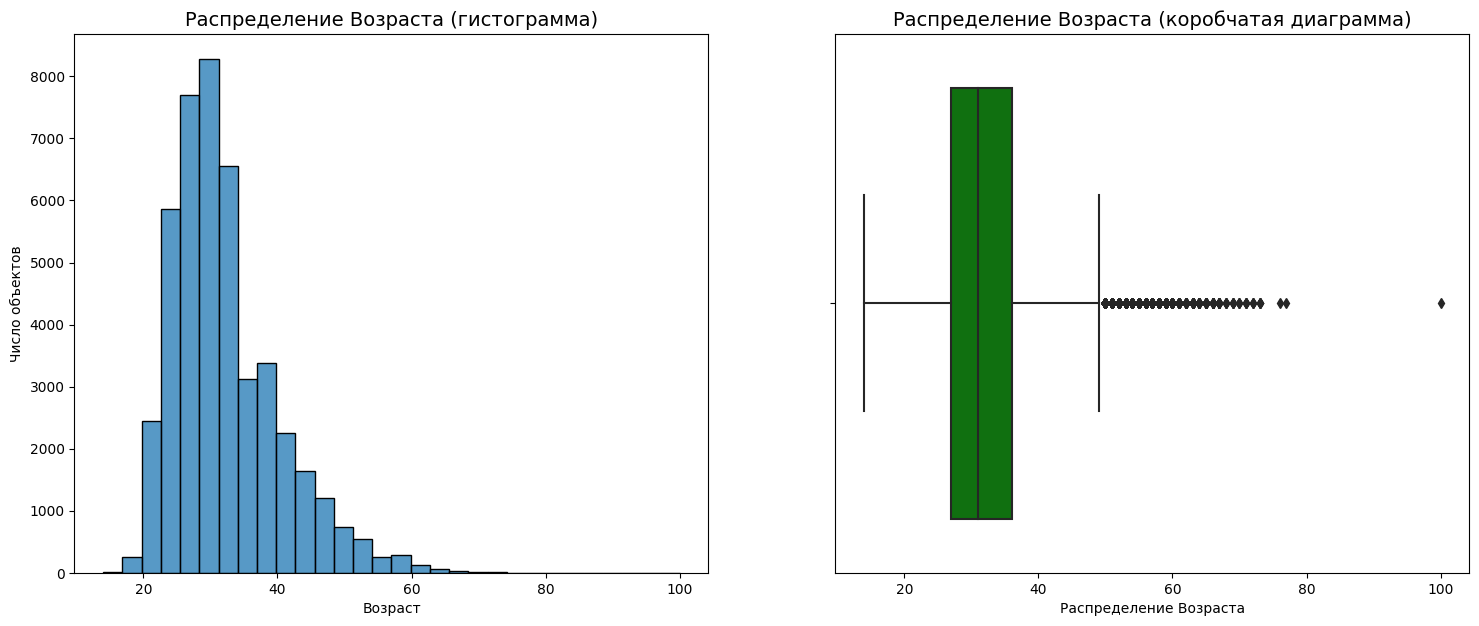

In [21]:
# ваш код здесь
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
histplot = sns.histplot(
    data=hh_data, 
    x='Возраст', 
    bins=30,
    ax=axes[0],
)
histplot.set_title('Распределение Возраста (гистограмма)', fontsize=14)
histplot.set_xlabel('Возраст')
histplot.set_ylabel('Число объектов');

boxplot = sns.boxplot(
    data=hh_data,
    x='Возраст',
    color='green',
    ax=axes[1]
);
boxplot.set_title('Распределение Возраста (коробчатая диаграмма)', fontsize=14)
boxplot.set_xlabel('Распределение Возраста')

ваши выводы по графику здесь

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [ ]:
# ваш код здесь

ваши выводы здесь

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [ ]:
# ваш код здесь

ваши выводы здесь

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [ ]:
# ваш код здесь

ваши выводы здесь

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [ ]:
# ваш код здесь

ваши выводы здесь

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [ ]:
# ваш код здесь

In [ ]:
ваши выводы здесь

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [ ]:
# ваш код здесь

ваши выводы здесь

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [ ]:
# ваш код здесь

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
# ваш код здесь

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
# ваш код здесь

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
# ваш код здесь

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
# ваш код здесь

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [12]:
# ваш код здесь

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [ ]:
# ваш код здесь

ваш коммментарий здесь